<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png"
width="700" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Pablo Ospina.</i>
<br>
<i><b>Asignatura:</b> Vida artificial</i>
<br>
<i><b>Estudiantes:</b> Chiara Valenzuela, Andrea Terraza y Miguel Thomas</i>
<br>
<i><b>Grupo:</b> Dracarys (A)</i>
<br>
<i><b>Tema:</b> Series de tiempo - Visualización</i>
<br>
<i>13/08/24</i>
</FONT>
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
plt.style.use('ggplot')

## Cargue en un dataframe el archivo vic_elec.csv disponible en este repositorio

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/vic_elec.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   52608 non-null  int64  
 1   Time         52608 non-null  object 
 2   Demand       52608 non-null  float64
 3   Temperature  52608 non-null  float64
 4   Date         52608 non-null  object 
 5   Holiday      52608 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 2.1+ MB


In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df.head()

,Time,Demand,Temperature,Date,Holiday
0,2012-01-01,4382.825174,21.40,2012-01-01,True
1,2012-01-01 00:30:00,4263.365526,21.05,2012-01-01,True
2,2012-01-01 01:00:00,4048.966046,20.70,2012-01-01,True
3,2012-01-01 01:30:00,3877.563330,20.55,2012-01-01,True
4,2012-01-01 02:00:00,4036.229746,20.40,2012-01-01,True


## Asigne a los índices de dataframe la columna Time, Ajuste los índices para que cumplan con el formato: %Y-%m-%d %H:%M:%S

In [6]:
df['Time'] = pd.to_datetime(df['Time'], format='mixed')
df.set_index('Time', inplace=True)
df.index = df.index.strftime('%Y-%m-%d %H:%M:%S')

In [7]:
df.head()

,Demand,Temperature,Date,Holiday
Time,,,,
2012-01-01 00:00:00,4382.825174,21.40,2012-01-01,True
2012-01-01 00:30:00,4263.365526,21.05,2012-01-01,True
2012-01-01 01:00:00,4048.966046,20.70,2012-01-01,True
2012-01-01 01:30:00,3877.563330,20.55,2012-01-01,True
2012-01-01 02:00:00,4036.229746,20.40,2012-01-01,True


## Cree un nuevo dataframe que contenga únicamente los datos del 2014

In [8]:
df['Date'] = pd.to_datetime(df.Date)

In [9]:
df14 = df[df['Date'].dt.year == 2014]

## Agregue una nueva columna llamada Day_Type.  Según el día de la semana que corresponda la columna deberá tener los siguientes valores:
·       "Weekday": para días de lunes a viernes que no son festivos

·       "Weekend": para sábados y domingos que nos son festivos

·       "Holiday": para cualquier día festivo.

In [10]:
def classify_day(row):
    if row['Holiday']:
        return "Holiday"
    elif row['Date'].weekday() >= 5:
        return "Weekend"
    else:
        return "Weekday"

In [11]:
df14['Day_Type'] = df14.apply(classify_day, axis=1)

<ipython-input-11-1f104971c8ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14['Day_Type'] = df14.apply(classify_day, axis=1)


In [12]:
df14.head()

,Demand,Temperature,Date,Holiday,Day_Type
Time,,,,,
2014-01-01 00:00:00,4091.593434,18.7,2014-01-01,True,Holiday
2014-01-01 00:30:00,4198.398912,18.1,2014-01-01,True,Holiday
2014-01-01 01:00:00,3914.647130,18.2,2014-01-01,True,Holiday
2014-01-01 01:30:00,3672.549608,17.9,2014-01-01,True,Holiday
2014-01-01 02:00:00,3497.539030,17.6,2014-01-01,True,Holiday


In [15]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17520 entries, 2014-01-01 00:00:00 to 2014-12-31 23:30:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Demand          17520 non-null  float64       
 1   Temperature     17520 non-null  float64       
 2   Date            17520 non-null  datetime64[ns]
 3   Holiday         17520 non-null  bool          
 4   Day_Type        17520 non-null  object        
 5   Demand_MA       17281 non-null  float64       
 6   Temperature_MA  17281 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), object(1)
memory usage: 975.2+ KB


## En un gráfico, visualice la demanda y la temperatura para el año 2014 (cada uno en su propio gráfico), Agregue la media móvil a cada uno. Determine un tamaño de ventana que permita visualizar de manera clara la tendencia.

In [13]:
df14['Demand_MA'] = df14['Demand'].rolling(window=240).mean()
df14['Temperature_MA'] = df14['Temperature'].rolling(window=240).mean()

<ipython-input-13-08e9dad85d90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14['Demand_MA'] = df14['Demand'].rolling(window=240).mean()
<ipython-input-13-08e9dad85d90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df14['Temperature_MA'] = df14['Temperature'].rolling(window=240).mean()


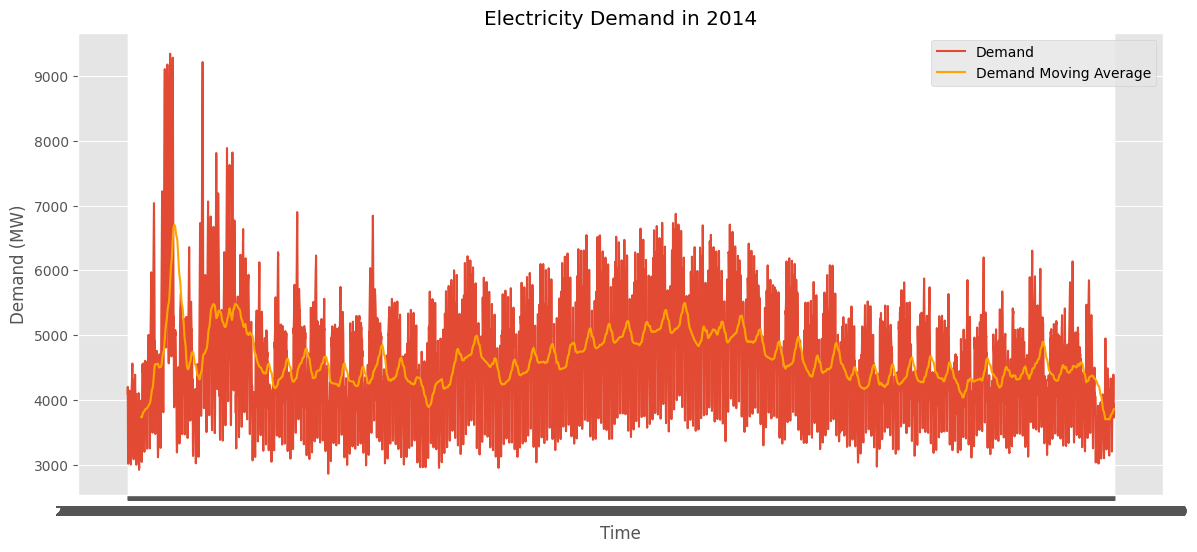

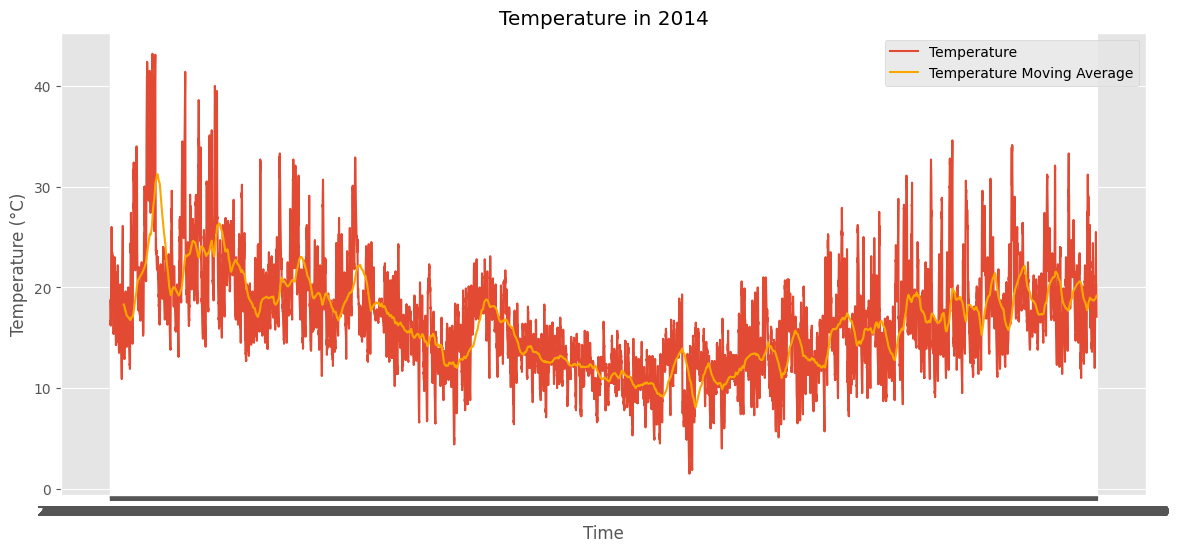

In [14]:
# Visualización de la demanda con media móvil
plt.figure(figsize=(14, 6))
plt.plot(df14.index, df14['Demand'], label='Demand')
plt.plot(df14.index, df14['Demand_MA'], label='Demand Moving Average', color='orange')
plt.title('Electricity Demand in 2014')
plt.xlabel('Time')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()

# Visualización de la temperatura con media móvil
plt.figure(figsize=(14, 6))
plt.plot(df14.index, df14['Temperature'], label='Temperature')
plt.plot(df14.index, df14['Temperature_MA'], label='Temperature Moving Average', color='orange')
plt.title('Temperature in 2014')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

## ¿Puede encontrar alguna relación entre la temperatura y el consumo de energía a partir de los dos gráficos anteriores? Explique su respuesta

Ambos gráficos muestran un patrón estacional, con picos y valles que parecen coincidir en el tiempo. En general, el consumo de energía parece ser mayor cuando la temperatura es más extrema (muy alta o muy baja).

- Cuando la temperatura es alta (sobre 30°C), se observa un aumento significativo en la demanda de energía. Esto podría estar relacionado con el uso de aire acondicionado y sistemas de refrigeración, que son comunes durante los meses más calurosos.

- Cuando las temperaturas son más bajas, también se observa un aumento en la demanda de energía, lo cual puede estar relacionado con el uso de calefacción.

La media móvil (línea amarilla) en ambos gráficos también parece seguir un patrón similar, lo que sugiere que hay una correlación entre la temperatura y el consumo de energía.

## Realice un diagrama de dispersión con la temperatura en el eje x y la demanda en el eje y. ¿Qué conclusiones podemos obtener a partir del gráfico?

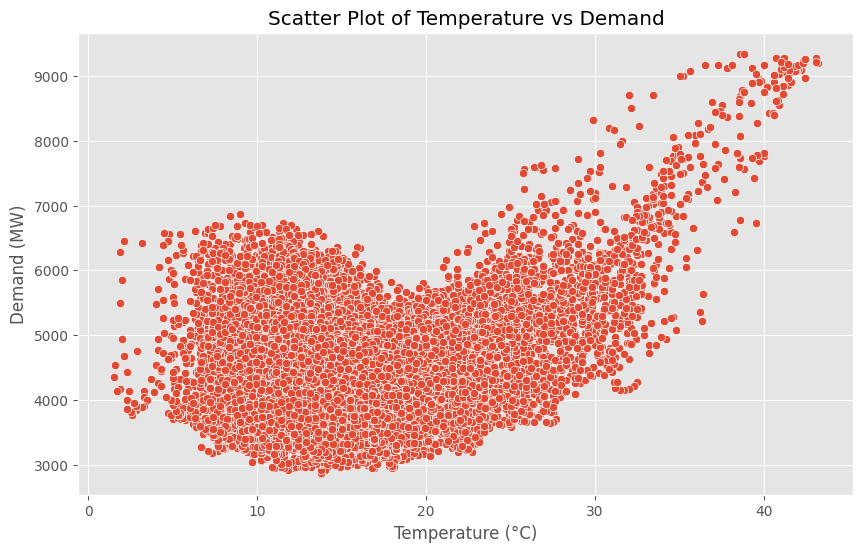

In [16]:
# Diagrama de dispersión de temperatura vs demanda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Demand', data=df14)
plt.title('Scatter Plot of Temperature vs Demand')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.show()

-  A medida que la temperatura aumenta por encima de los 20°C, la demanda de energía también aumenta de manera más pronunciada.

- Cuando la temperatura supera los 30°C, se observa un incremento significativo en la demanda de energía. Esto sugiere que en temperaturas muy altas, hay un mayor uso de sistemas de enfriamiento como el aire acondicionado, lo que incrementa la demanda de electricidad.

- En el rango de temperaturas bajas (0-10°C), la demanda de energía también tiende a ser alta en comparación con temperaturas moderadas. Esto podría deberse al uso de calefacción en climas fríos.

- La dispersión de puntos forma una curva en forma de "U", lo que indica que tanto en temperaturas bajas como en temperaturas altas, la demanda de energía es mayor, mientras que en temperaturas moderadas, la demanda tiende a ser menor.

## Realice nuevamente un gráfico de dispersión como en el punto anterior, pero ahora visualizando los valores de la columna “Day_type” cada uno en un color diferente. ¿Qué conclusiones podemos obtener a partir del gráfico?

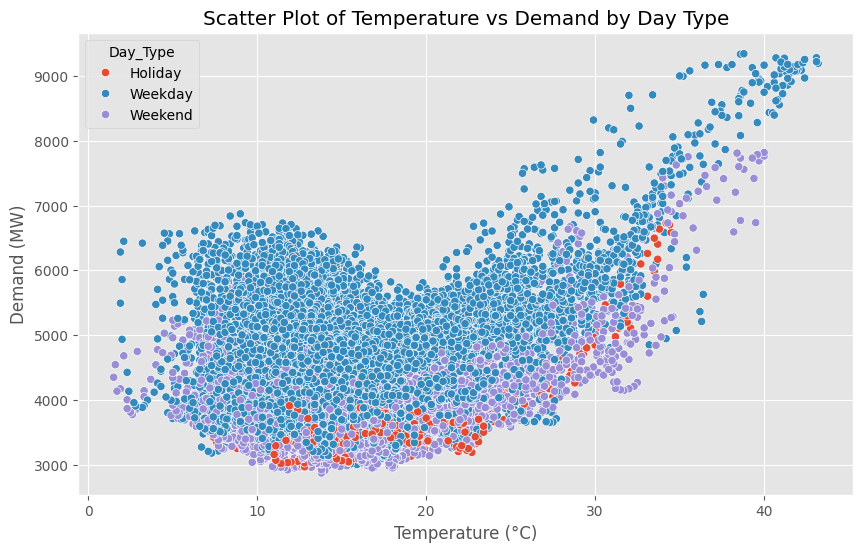

In [17]:
# Diagrama de dispersión con colores según "Day_Type"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Demand', hue='Day_Type', data=df14)
plt.title('Scatter Plot of Temperature vs Demand by Day Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.show()

1. **Patrones de Demanda por Tipo de Día:**
   - **Días de Semana (`Weekday`):** Representados en azul, tienen una gran dispersión en toda la gráfica, especialmente cuando la temperatura es más alta (por encima de los 20°C), lo que sugiere que la demanda tiende a ser más alta durante los días laborales, especialmente en condiciones de alta temperatura.
   - **Fines de Semana (`Weekend`):** Representados en púrpura, muestran un patrón similar a los días de semana, aunque con una ligera tendencia a tener una menor demanda en temperaturas medias y bajas. Esto podría indicar una menor actividad económica o industrial durante los fines de semana.
   - **Días Festivos (`Holiday`):** Representados en rojo, parecen tener la menor demanda en general y están mayormente concentrados en la parte baja del gráfico (con temperaturas entre 10°C y 20°C), lo que sugiere que la actividad es considerablemente menor durante los días festivos, independientemente de la temperatura.

2. **Efecto de la Temperatura:**
   - Hay una clara tendencia al alza en la demanda de energía a medida que la temperatura aumenta, visible en todos los tipos de día. Sin embargo, este efecto parece ser más pronunciado en los días laborales.

3. **Extremos en la Demanda:**
   - Las demandas más altas (cercanas a los 9000 MW) se observan principalmente en días laborales con temperaturas superiores a los 30°C, lo que podría estar relacionado con un aumento en el uso de aire acondicionado y otras necesidades energéticas.

## Genere una matriz de dispersión para las columnas de la 2 a la 6 del archivo us_change.csv disponible en repositorio. Utilice comandos como pairplot() de Seaborn o similares. ¿Qué conclusiones podemos obtener a partir del gráfico?

In [21]:
df_us_change = pd.read_csv('https://raw.githubusercontent.com/jpospinalo/time-series/main/us_change.csv')
df_us_change.drop(columns=['Unnamed: 0'], inplace=True)

In [25]:
df_us_change.head()

,Quarter,Consumption,Income,Production,Savings,Unemployment
0,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
1,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
2,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
3,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
4,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1


In [33]:
def convert_quarter_to_date(quarter_str):
    year, q = quarter_str.split(' ')
    month = (int(q[1]) - 1) * 3 + 1  # Calcula el mes de inicio del trimestre
    return pd.Timestamp(f'{year}-{month:02d}-01')

In [34]:
df_us_change['Quarter'] = df_us_change['Quarter'].apply(convert_quarter_to_date)
df_us_change.set_index('Quarter', inplace=True)

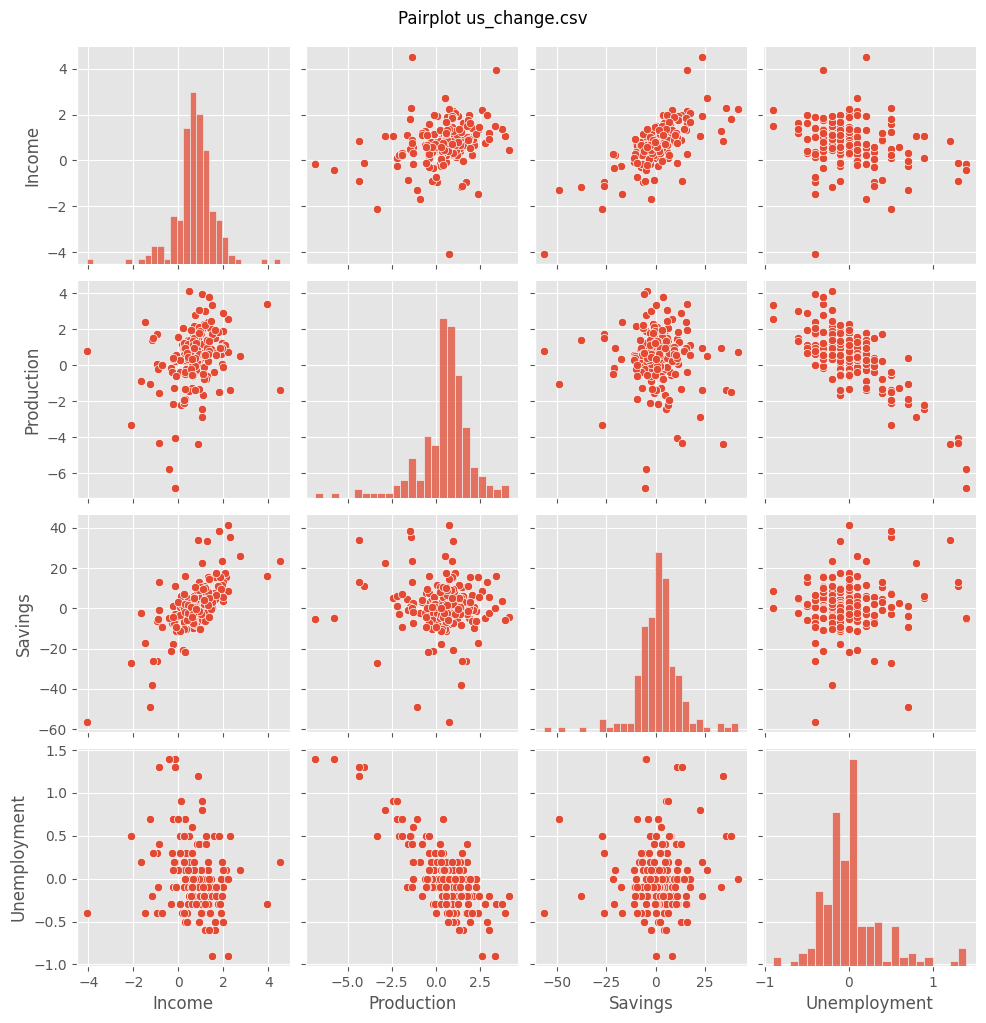

In [36]:
sns.pairplot(df_us_change.iloc[:, 1:6])
plt.suptitle('Pairplot us_change.csv', y=1.02)
plt.show()

- **Income vs. Production:** Existe una correlación positiva entre `Income` y `Production`, lo que indica que a medida que el ingreso aumenta, también lo hace la producción.
- **Income vs. Savings:** La relación entre `Income` y `Savings` muestra cierta correlación positiva, sugiriendo que un mayor ingreso puede estar asociado con un aumento en el ahorro.
- **Production vs. Unemployment:** Hay una correlación negativa entre `Production` y `Unemployment`, lo que podría indicar que una mayor producción está asociada con una menor tasa de desempleo.
- **Savings vs. Unemployment:** También hay una relación negativa entre `Savings` y `Unemployment`, lo que sugiere que a medida que aumentan los ahorros, el desempleo tiende a disminuir.
- **Savings vs. Production:** La relación entre `Savings` y `Production` parece ser ligeramente positiva, aunque con mayor dispersión de los puntos.